# Week 3 handin

## 01 Assignment

## Ex 1 Classes
1. Create 3 classes: Student, DataSheet and Course
2. A student has a data_sheet and a data_sheet has multiple courses in particular order
3. Each course has name, classroom, teacher, ETCS and optional grade if course is taken.
4. In Student create __init__() so that a Student can be initiated with name, gender, data_sheet and image_url
5. In DataSheet create a method to get_grades_as_list()
6. In student create a method: get_avg_grade()
7. Create a function that can generate n number of students with random: name, gender, courses (from a fixed list of course names), grades, img_url
   1. Let the function write the result to a csv file with format stud_name, course_name, teacher, ects, classroom, grade, img_url
7. Read student data into a list of Students from a csv file: 
   1. loop through the list and print each student with name, img_url and avg_grade.
   2. sort the list by avg_grade
   3. create a bar chart with student_name on x and avg_grade on y-axis
8. Make a method on Student class that can show progression of the study in % (add up ECTS from all passed courses divided by total of 150 total points (equivalent to 5 semesters))
9. Show a bar chart of distribution of study progression on x-axis and number of students in each category on y-axis. (e.g. make 10 categories from 0-100%)

Extra: Make the Datasheet class iterable so that next(data_sheet) will return the next course in the list

## Ex 2 Exceptions (extra)
1. Create a function that can take a list of students and return the 3 students closest to completing their study.
2. If list is shorter than 3 raise your own custom exception (NotEnoughStudentsException)
3. Create another function that can create a csv file with 3 students closest to completion
   1. If an exception is raised write an appropriate message to the file

## Ex 3 Plotting (extra)
1. Create a function that can take a list of students and show a pie chart of how students are distributed in ECTS percentage categories (10%, 20%, ...)
2. create a function that can take a list of students and show how many students have taken each course (bar chart)
   1. create a method on student that can return a list of courses
3. make the figure show males and females in different colors for each course (display 2 datasets in same figure)


## 02 Status
Completed all EX1 tasks

## Exercise 1

### Excersie 1-6
Create 3 classes: Student, DataSheet and Course
A student has a data_sheet and a data_sheet has multiple courses in particular order
Each course has name, classroom, teacher, ETCS and optional grade if course is taken.
In Student create init() so that a Student can be initiated with name, gender, data_sheet and image_url
In DataSheet create a method to get_grades_as_list()
In student create a method: get_avg_grade()

In [127]:
class Student():
    """A student representation, students have name, a student ID , gender, a datesheet and a image_url"""

    def __init__(self, name, studentid, gender, datasheet, image_url=None):
        """Initialize name, student ID, gender, datasheet and image_url."""
        self.name = name 
        self.studentid = studentid
        self.gender = gender
        self.datasheet = datasheet
        self.image_url = image_url        
    
    def __repr__(self):
        return 'Student(%r, %r, %r, %r, %r)' % (self.name, self.gender, self.studentid, 
                                     self.datasheet, self.image_url)
    
    def __str__(self):
        return 'Student with name {name} identifies as {gender} witd ID: {id}, studentpicture: {pic} his/her/their datasheet looks like this: {datasheet}.'.format(
            name=self.name, gender=self.gender, id=self.studentid, pic=self.image_url, datasheet=self.datasheet)
    
    def get_avg_grade(self):
        grades = self.datasheet.get_grades_as_list()
        return sum(grades)/len(grades)
    
    def get_education_progress(self):
        return (self.datasheet.get_completed_etcs()/150)*100

class Datasheet():

    def __init__(self, courses=[]):
        """A datasheet consists of multiple courses."""
        self.courses = courses
        

    def __repr__(self):
        return 'Datasheet(%r' % (self.courses)

    def get_grades_as_list(self):
        returnlist = []
        for course in self.courses:
            returnlist.append(int(course.getGrade()))
        return returnlist
    
    def get_completed_etcs(self):
        sum = 0
        for x in self.courses:
            sum += x.etcs
        return sum
                
class Course():
    """A course consist of name, classroom, teacher, ETCS and optional grade"""

    def __init__(self, name, classroom, teacher, etcs, grade):
        """Initialize the course with name, classroom, teacher, ETCS and optional grade"""
        self.name = name
        self.classroom = classroom
        self.teacher = teacher
        self.etcs = etcs
        self._grade = grade

        
    def __repr__(self):
        return 'Course(%r, %r, %r, %r, %r)' % (self.name, self.classroom, self.teacher, self.etcs, self._grade)
    
    def __str__(self):
        return 'Course name is {name} taking place in {classroom}, with the {teacher} as the teacher, it gives {etcs} etcs points and the student has the current grade of {grade}.'.format(
            name=self.name, classroom=self.classroom, teacher=self.teacher, etcs=self.etcs, grade=self._grade)

    def getGrade(self):
        return self._grade


In [135]:
testStudent = Student("Allan Simonsen", "cph-as484", "Male", Datasheet([Course("Python", "1.05", "Thomas", 10, "12")]), "handsomepicture.jpg")
print(testStudent)

Student with name Allan Simonsen identifies as Male witd ID: cph-as484, studentpicture: handsomepicture.jpg his/her/their datasheet looks like this: Datasheet([Course('Python', '1.05', 'Thomas', 10, '12')].


### Excersise 7
7. Create a function that can generate n number of students with random: name, gender, courses (from a fixed list of course names), grades, img_url
   1. Let the function write the result to a csv file with format stud_name, course_name, teacher, ects, classroom, grade, img_url

In [136]:
import random
import csv

fnames = ["Allan", "Jacob", "Tobias", "Pia", "Axel", "Hans", "Thomas", "Lars", "Ulrik", "Caroline", "Louise", "Simonse", "Sylvia", "Kristian", "Andreas", "Anders", "Nina", "sofie"]
lnames = ["Simonsen", "Holm", "Jensen", "Hansen", "Olsen", "Jakobsen", "Bjørnsen", "Iversen", "Elleman", "Klenum", "Lyft"]
genderlist = ["Male", "Female", "Other"]
grades = ["-3", "00", "02", "4", "7", "10", "12"]
coursenames = ["Python", "Javascript", "Security", "IoT", "Advanced Programming", "Funktionel Programming", "Programming First Year", "Programming Second Year"]

def generateStudents(n):
    """a function that generates N amount of student with 3 courses each and returns a list"""
    studentlist=[]
    for i in range(n):
        studentname = random.choice(fnames) + " " + random.choice(lnames)
        studentid = "cph-" + str(random.randrange(111,999))
        gender = random.choice(genderlist)
        courses = []
        for coursename in random.sample(coursenames, random.randrange(3,6)):
            courses.append(Course(coursename, "1.05", random.choice(fnames), 10, random.choice(grades)))
        image_url = "picture" + str(random.randrange(11111,99999)) + ".jpg"

        studentlist.append(Student(studentname, studentid, gender, Datasheet(courses),image_url))
    return studentlist


def write_list_to_csv(output_file, students):
    with open(output_file, "w") as file_object:
        csv_writer = csv.writer(file_object)
        csv_writer.writerow(["Student_name", "Studentid" "Gender", "Course_name",
                                "Teacher", "ECTS", "Classroom", "Grade", "Img_url"])
        for x in students:
            for course in x.datasheet.courses:
                csv_writer.writerow([x.name, x.studentid, x.gender, course.name, course.teacher, course.etcs, course.classroom, course._grade, x.image_url])


In [139]:
studentslisttest = generateStudents(5)
output_file = "week3modules/students.csv"

print(*studentslisttest, sep = "\n")
write_list_to_csv(output_file, studentslisttest)

Student with name sofie Jakobsen identifies as Other witd ID: cph-468, studentpicture: picture42068.jpg his/her/their datasheet looks like this: Datasheet([Course('Programming Second Year', '1.05', 'Pia', 10, '4'), Course('Security', '1.05', 'Lars', 10, '7'), Course('IoT', '1.05', 'Lars', 10, '00')].
Student with name Kristian Hansen identifies as Female witd ID: cph-807, studentpicture: picture87763.jpg his/her/their datasheet looks like this: Datasheet([Course('Programming Second Year', '1.05', 'Hans', 10, '00'), Course('Python', '1.05', 'Sylvia', 10, '7'), Course('IoT', '1.05', 'sofie', 10, '7'), Course('Programming First Year', '1.05', 'Allan', 10, '02'), Course('Advanced Programming', '1.05', 'Kristian', 10, '-3')].
Student with name Simonse Jakobsen identifies as Other witd ID: cph-728, studentpicture: picture16788.jpg his/her/their datasheet looks like this: Datasheet([Course('Programming Second Year', '1.05', 'Andreas', 10, '7'), Course('Advanced Programming', '1.05', 'Caroline

### Exercise 8
8. Read student data into a list of Students from a csv file: 
   1. loop through the list and print each student with name, img_url and avg_grade.
   2. sort the list by avg_grade
   3. create a bar chart with student_name on x and avg_grade on y-axis

In [131]:
import csv
def read_from_csvfile(inputfile):
    student_list = []
    with open(inputfile, "r") as file_object:
        csvreader = csv.reader(file_object)
        print(next(csvreader))
        formerstudent = Student("", "", "",[] , "")
        for line in csvreader:
            name, studentid, gender, course, teacher, etcs, classroom, grade, image_url = line
            newstudent = Student(name, studentid, gender, Datasheet([Course(course, classroom, teacher, etcs, grade)]), image_url)
            if newstudent.name == formerstudent.name:
                formerstudent.datasheet.courses.append(Course(course, classroom, teacher, etcs, grade))
            else:
                student_list.append(newstudent)
                formerstudent = newstudent
    return student_list

def taskA(inputlist):
    printlist = []
    for x in inputlist:
        printlist.append([x.name, x.image_url, x.get_avg_grade()])
    return printlist

def taskB(inputlist):
    printlist = []
    for x in inputlist:
        printlist.append([x.name, x.image_url, x.get_avg_grade()])
    printlist.sort(key=lambda x: x[2], reverse=True)
    return printlist


Testing CSV reader
['Student_name', 'StudentidGender', 'Course_name', 'Teacher', 'ECTS', 'Classroom', 'Grade', 'Img_url']
Student with name Sylvia Klenum identifies as Female witd ID: cph-258, studentpicture: picture97812.jpg his/her/their datasheet looks like this: Datasheet([Course('Javascript', '1.05', 'Lars', '10', '4'), Course('Advanced Programming', '1.05', 'Caroline', '10', '4'), Course('Programming Second Year', '1.05', 'Louise', '10', '12'), Course('Python', '1.05', 'Caroline', '10', '02')].
Student with name Simonse Bjørnsen identifies as Male witd ID: cph-197, studentpicture: picture26837.jpg his/her/their datasheet looks like this: Datasheet([Course('IoT', '1.05', 'Lars', '10', '7'), Course('Advanced Programming', '1.05', 'sofie', '10', '12'), Course('Programming Second Year', '1.05', 'Allan', '10', '00'), Course('Funktionel Programming', '1.05', 'Lars', '10', '12'), Course('Javascript', '1.05', 'Simonse', '10', '12')].
Student with name Allan Simonsen identifies as Female 

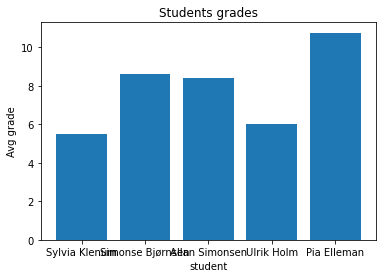

In [132]:
import matplotlib.pyplot as plt

print("Testing CSV reader")
input_file = "week3modules/students.csv"
input_from_csvfile = read_from_csvfile(input_file)
print(*input_from_csvfile, sep = "\n")

print("Task A")
print(*taskA(input_from_csvfile), sep = "\n")

print("Task B")
print(*taskB(input_from_csvfile), sep = "\n")

print("Task C")

name = []
grade = []
for x in taskA(input_from_csvfile):
    name.append(x[0])
    grade.append(x[2])
plt.figure()
plt.bar(name, grade)
plt.title("Students grades")
plt.xlabel("student")
plt.ylabel("Avg grade")
plt.show(block=True)


### Exercise 9
9. Make a method on Student class that can show progression of the study in % (add up ECTS from all passed courses divided by total of 150 total points (equivalent to 5 semesters))


In [140]:
studentslistex9 = generateStudents(5)

for x in studentslistex9:
    print ("Name: " + x.name + " Has completed: " + str(x.get_education_progress()) + "%")

Name: Tobias Klenum Has completed: 26.666666666666668%
Name: Thomas Jensen Has completed: 20.0%
Name: Hans Simonsen Has completed: 26.666666666666668%
Name: Caroline Jensen Has completed: 33.33333333333333%
Name: Andreas Klenum Has completed: 20.0%


### Exercise 10
10. Show a bar chart of distribution of study progression on x-axis and number of students in each category on y-axis. (e.g. make 10 categories from 0-100%)


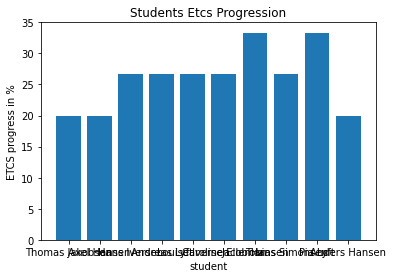

In [134]:
import matplotlib.pyplot as plt

studentslistex10 = generateStudents(10)
names = []
etcsprog = []
for x in studentslistex10:
    names.append(x.name)
    etcsprog.append(x.get_education_progress())
plt.figure()
plt.bar(names, etcsprog)
plt.title("Students Etcs Progression")
plt.xlabel("student")
plt.ylabel("ETCS progress in %")
plt.show(block=True)
